### Variable neighborhood search

Z uporabo metahevrističnega algoritma preverjamo našo hipotezo o grafih z največjo sigma nepravilnostjo.

Opis algoritma:

- Glej pdf iz spletne - stran 10
- Soseščine se bodo naključno izbirale

In [28]:
# importing necessary libraries
import random
import math
from itertools import combinations

# function for generating random neighbour of graph G
def random_neighbour(G, K):
    # choose option ( delete, add)
    options = [(0, 1), (1, 0), (1, 1), (2, 1), (1, 2), (2, 2)]
    d, a = options[K]

    # get node
    N = G.vertices()[randrange(G.order())]

    # remove d edges from n (if possible)
    for f in range(d):
        if len(G.neighbors(N)) != 0:
            G.delete_edge(N, G.neighbors(N)[randrange(len(list(G.neighbors(N))))])
    
    # add up to a edges
    k = 0 # max number of iterations counter
    j = 0 # counter for number of added edges
    while k < 8 and j < a:
        k += 1
        # new node
        V = G.vertices()[randrange(G.order())]
        if V == N or V in G.neighbors(N): # if node is N or is already connected to N, we skip it
            continue
        G.add_edge(N, V)
        
        # is triangle free
        if G.triangles_count() != 0:
            G.delete_edge(N, V) # if its not triangle free, we remove the edge that we added
        else: 
            j += 1
            continue

    return G # we return random neighbour

In [29]:
# sigma total irr, our f(s)
def sigma_irr(G):
    return sum((u - v) ** 2 for u, v in combinations(G.degree(), 2))

In [30]:
# variable neighborhood search - main function(our inital solution, number of neighborhoods, number of tweaks, max. it)
def variable_neighborhood_search(inital_G, k, m, max_iterations_without_improvement):
    G = inital_G.copy() # set G
    best = G.copy() # set current best
    num_of_it_without_improvement = 0 # counter for iterations without improvement

    while num_of_it_without_improvement < max_iterations_without_improvement:
        
        # choose neighborhood
        j = randrange(k)

        # new solution m times
        G_mod = random_neighbour(G, j)

        for i in range(m-1):
            G_mod_mod = random_neighbour(G, j) # additional option

            # check if its better
            if sigma_irr(G_mod_mod) > sigma_irr(G_mod):
                G_mod = G_mod_mod.copy()

        # update G 
        G = G_mod.copy()

        # check if its better than current best
        if sigma_irr(G) > sigma_irr(best):
            best = G.copy()
            num_of_it_without_improvement = 0 # reset counter
        else: # count this iteration as "failed"
            num_of_it_without_improvement += 1

    return best, G # return best solution and last option

### Pridobivanje prve rešitve

In [31]:
# generate star graph with max sigma total irr. (in center there can be multiple vertices)
def generate_max_sigma_star_graph(n):
    
    # generate star graph with or order n and c central vertices
    def generate_star_graph(n, c):
        graph = {} # dict. of neighbours
        i = 0
        for k in range(n): 
            i += 1
            if i <= c: # if vertex is central, set outer vertices as neighbors
                graph[k] = list(range(c, n))
            else: # else vertex is outer, set central vertices as neighbors
                graph[k] = list(range(c))
        
        return Graph(graph)


    max_sigma = 0 # for keeping maximum sigma value
    max_sigma_graphs = [] # list of graphs with maximum sigma value

    # check all graphs, where number of central nodes varies
    for c in range(1, round(n/2)):
        G = generate_star_graph(n, c) # get star graph
        sigma = sigma_irr(G) # get sigma value of star graph

        if sigma > max_sigma: # update if its the best
            max_sigma_graphs = [G]
            max_sigma = sigma
        elif sigma == max_sigma: # if equal, just append
            max_sigma_graphs.append(G)
    
    return max_sigma_graphs # return all graphs with max sigma value

### Poganjanje algoritmov - zaenkrat samo testiranje

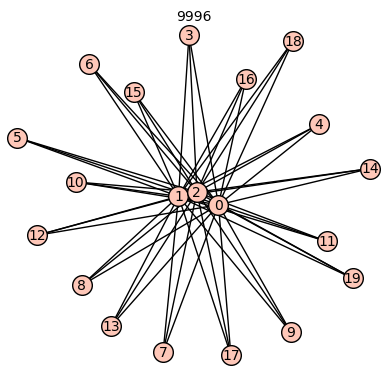

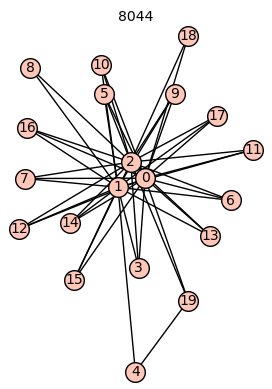

9996 8044


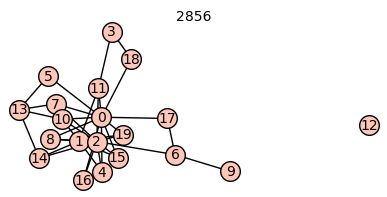

9996 2856


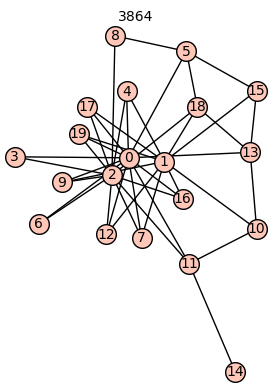

9996 3864


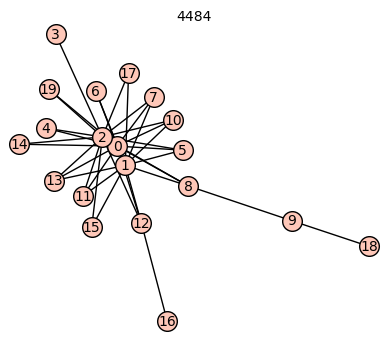

9996 4484


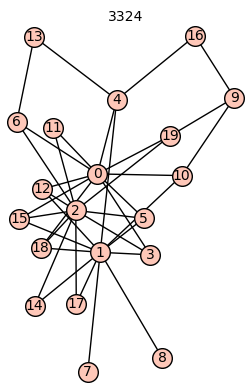

9996 3324


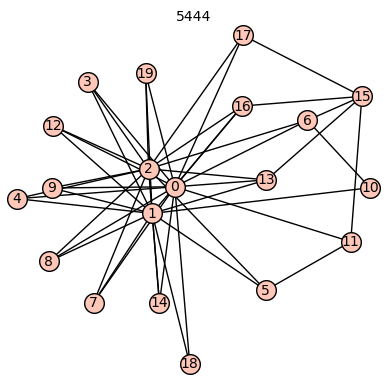

9996 5444


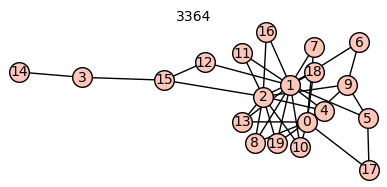

9996 3364


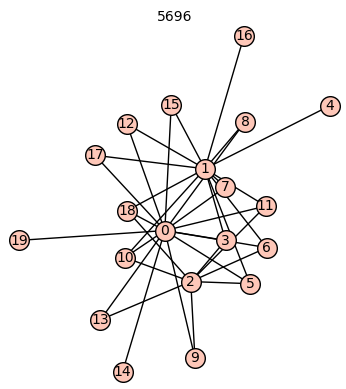

9996 5696


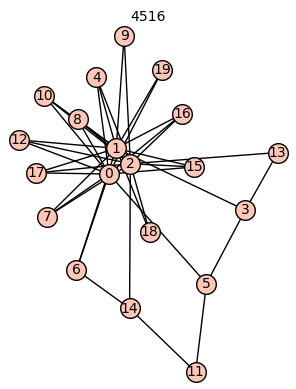

9996 4516


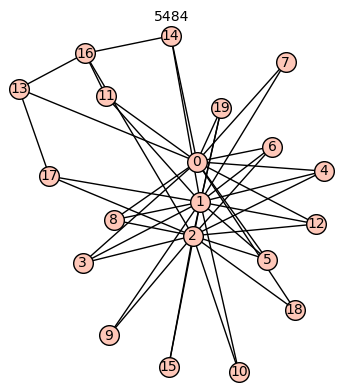

9996 5484


In [42]:
n = 20
k = 6
m = 5
initial_G = generate_max_sigma_star_graph(n)
initial_G[0].show(title=f"{sigma_irr(initial_G[0])}")
max_iterations_without_improvement = 4 # v končnem izdelku bomo imeli graf razlike


for i in range(10):
    Best, G = variable_neighborhood_search(initial_G[0], k, m, max_iterations_without_improvement)
    G.show(title=f"{sigma_irr(G)}")
    print(sigma_irr(Best), sigma_irr(G))